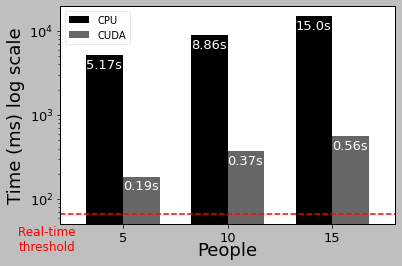

In [212]:
# Jetson REID Performance of 2 models, on CPU and GPU, on 5/10/15 people
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('grayscale')

threshold = 1 / 15
data = pd.read_csv("data_files/osnet_reid.tsv", sep='\t', index_col=0)
# Jetson performance for custom models
infer_time_conv_lstm_cuda = 0.01849541664123535
infer_time_resnet_cuda = 0.03377264738082886

data["CUDA"] *= 1000
data["CPU"] *= 1000
ax = data.plot.bar(width=0.7)

plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13)
plt.axhline(y=threshold * 1000, c='r', linestyle='--')
plt.yscale("log")
plt.ylabel("Time (ms) log scale", fontsize=18)
plt.xlabel("People", fontsize=18, labelpad=-3)
plt.grid(False)
plt.text(-1, 25, 'Real-time \nthreshold', c='r', fontsize=12)
for p in ax.patches:
    ax.annotate(str(round(p.get_height() / 1000, 2)) + 's', (p.get_x() * 1.0, p.get_height() * 0.7), c="w", fontsize=13)
plt.savefig("REID_perf_jetson.pdf")
# This probably needs more data to create a stacked bar chart of how long each step takes

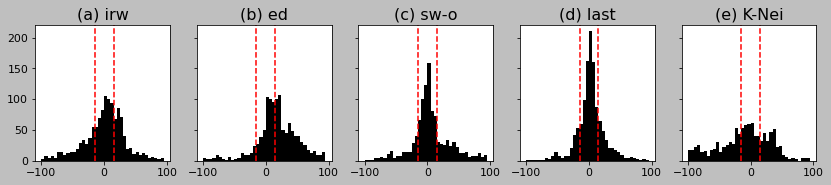

In [73]:
# Code to plot the histogram of differences for each model from the ground truth
import json
import matplotlib.pyplot as plt
from statistics import median

plt.style.use('grayscale')
data = None
with open("data_files/transition_time_models_diff.json", "r") as f:
    data = json.load(f)

# Order is irw, ed, 
# method, result = list(data.items())[0]
# plt.hist(result, range(-100, 100, 5), label=method)
# plt.xlim(-100,100)
# plt.ylim(0,200)
# # plt.xlabel("Difference (frames)", fontsize=18)
# # plt.ylabel("Count", fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# # plt.legend()
# # plt.show()
# plt.savefig("time_diff_{}.pdf".format(method))
# plt.clf()

# for i, (method, result) in enumerate(list(data.items())[1:]):
#     # plt.subplot(1, 5, i+1)
#     # plt.tight_layout()
#     ax = plt.hist(result, range(-100, 100, 5), label=method)
#     plt.xlim(-100,100)
#     plt.ylim(0,200)
#     # plt.xlabel("Difference (frames)", fontsize=18)
#     # plt.ylabel("Count", fontsize=18)
#     plt.xticks(fontsize=15)
#     plt.yticks([])
#     # ax[1].set_tick_labels([])
#     # plt.legend()
#     # plt.show()
#     plt.savefig("time_diff_{}.pdf".format(method))
#     plt.clf()
fig, axs = plt.subplots(1,5, figsize=(14,2.5), sharey=True, gridspec_kw={'wspace': 0.2})
for i in range(5):
    method, result = list(data.items())[i]
    axs[i].hist(result, range(-100, 100, 5), label=method)
    axs[i].set_title("({letter}) {method}".format(letter=chr(97 + i), method=method), fontsize=16)
    # axs[i].xlim(-100,100)
    # axs[i].ylim(0,200)
    axs[i].axvline(x=-15, c='r', linestyle='--')
    axs[i].axvline(x=15, c='r', linestyle='--')
    axs[i].tick_params(axis='both', which='major', labelsize=11)
    axs[i].tick_params(axis='both', which='minor', labelsize=11)
    # plt.savefig("time_diff_{}.pdf".format(method))
    # plt.clf()==
# axs[0].set_ylabel("Count", fontsize=16)
# axs[2].set_xlabel("Frame Difference", fontsize=16)
plt.savefig("time_diff.pdf", bbox_inches = 'tight', pad_inches = 0)

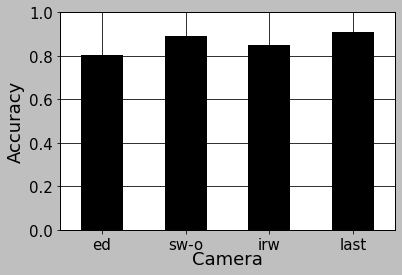

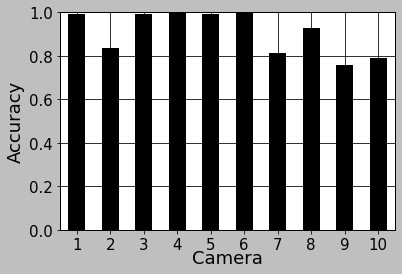

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('grayscale')

data = pd.read_csv("data_files/target_camera_results_chart_rdy.csv")

ax = data.iloc[:4].plot.bar(x="Sampling", y="Accuracy", ylim=(0,1), grid=True, legend=False)
ax.set_ylabel("Accuracy")
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xlabel("Camera", fontsize=18, labelpad=-2)
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("target_camera_comparison.pdf")

# plt.clf()
ax = data.plot.bar(y="last", ylim=(0,1), grid=True, legend=False)
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_xlabel("Camera", fontsize=18, labelpad=-3)
plt.xticks(rotation=0, fontsize=15)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = list(range(1,11))
ax.set_xticklabels(labels)
plt.yticks(fontsize=15)
plt.savefig("target_camera_last.pdf")

In [4]:
import pandas as pd

data = pd.read_excel("data_files/accuracy_raw_comparison_files.xlsx")
data

,Unnamed: 0,filename,percentage of frames processed / total number of frames,percentage of target frames / total number of frames,precision,accuracy
0,0,start_2_end_7_run_42track.csv,5.364583,4.713542,86.569579,98.526703
1,1,start_3_end_2_run_44track.csv,0.393519,5.671296,11.764706,0.816327
2,2,start_1_end_5_run_30track.csv,7.214035,6.498246,85.700389,95.140389
3,3,start_8_end_9_run_29track.csv,5.988244,5.422483,88.098160,97.289973
4,4,start_9_end_7_run_32track.csv,7.191011,6.248920,83.653846,96.265560
...,...,...,...,...,...,...
479,479,start_7_end_4_run_31track.csv,5.785037,5.511064,89.981785,94.455067
480,480,start_6_end_9_run_34track.csv,6.686236,6.210046,84.585366,91.071429
481,481,start_3_end_9_run_35track.csv,7.788555,6.304559,65.255293,80.615385
482,482,start_3_end_8_run_40track.csv,5.651578,5.089163,52.669903,58.490566
